In [6]:
# 使用的框架paddle
# 相关框架的加载
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import os
import gzip
import json
import random
import numpy as np

In [4]:
# 声明数据集文件位置
datafile = 'mnist .json.gz'
print(f'加载数据从{datafile}')
# 加载json数据文件
data = json.load(gzip.open(datafile))
print('数据集加载完毕')
# 读取到的数据区分训练集，验证集，测试集
train_set, val_set, eval_set = data

# 观察训练集数据
imgs, labels = train_set[0], train_set[1]
print("训练数据集数量: ", len(imgs))

# 观察验证集数量
imgs, labels = val_set[0], val_set[1]
print("验证数据集数量: ", len(imgs))

# 观察测试集数量
imgs, labels = val= eval_set[0], eval_set[1]
print("测试数据集数量: ", len(imgs))
print(len(imgs[0]))

加载数据从mnist .json.gz
数据集加载完毕
训练数据集数量:  50000
验证数据集数量:  10000
测试数据集数量:  10000
784


In [17]:
# 数据加载
def load_data(mode='train', batch_size = 100):
    """ 
    加载数据函数
    传入两个参数mode,batch_size
    """
    datafile = './mnist .json.gz'
    print(f'加载数据从{datafile}')
    # 加载json数据文件
    data = json.load(gzip.open(datafile))
    print(f'加载数据集完毕')

    # 根据输入的参数进行数据的划分
    train_set, val_set, eval_set = data
    if mode == 'train':
        imgs, labels = train_set[0], train_set[1]
    elif mode == 'valid':
        imgs, labels = val_set[0], val_set[1]
    elif mode == 'eval':
        imgs, labels = eval_set[0], eval_set[1]
    else:
        raise Exception("mode 参数必须为['train','valid', 'eval']")
    print(f"加载的数据集数量{len(imgs)}")

    # 获取数据集的长度
    imgs_length = len(imgs)

    # 给每一条数据编号
    index_list = list(range(imgs_length))
    BATCHSIZE = batch_size

    # 定义数据生成器
    def data_generator():
        if mode == 'train':
            # 训练模式下要打乱数据
            random.shuffle(index_list)
        imgs_list = []
        labels_list = []
        for i in index_list:
            # 处理数据
            img = np.array(imgs[i]).astype('float32')
            label = np.array(labels[i]).astype('float32')
            imgs_list.append(img)
            labels_list.append(label)
            if len(imgs_list) == BATCHSIZE:
                # 获得一个BATCHSIZE的数据
                yield np.array(imgs_list),np.array(labels_list)
                # 数据清空，加载下一批
                imgs_list = []
                labels_list = []
        
        # 对于小于BATCESIZE的
        if len(imgs_list)>0:
            yield np.array(imgs_list), np.array(labels_list)
    return data_generator 

In [9]:
import numpy as np

b = np.zeros((1,100))
print(b)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


In [25]:


# 全连接神经网络的搭建，三层
import numpy as np

class ThreeLayerNetwork(object):
    def __init__(self, input_num, hidden1_num, hidden2_num, output_num):
        # 使用Xavier初始化权重
        self.W1 = np.random.randn(input_num, hidden1_num) / np.sqrt(input_num)
        self.b1 = np.zeros((1, hidden1_num))
        self.W2 = np.random.randn(hidden1_num, hidden2_num) / np.sqrt(hidden1_num)
        self.b2 = np.zeros((1, hidden2_num))
        self.W3 = np.random.randn(hidden2_num, output_num) / np.sqrt(hidden2_num)
        self.b3 = np.zeros((1, output_num))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1 
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        return self.z3

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1-self.sigmoid(x))
    
    def loss2(self, y_pred, y_true):
        error = y_pred - y_true
        num_sample = y_pred.shape[0]
        cost = np.sum(error ** 2)/ num_sample
        return cost
    
    def gradient(self, X, y_pred, y_true):
        m = y_pred.shape[0]
        delta3 = (y_pred - y_true)
        dW3 = np.dot(self.a2.T, delta3) / m
        db3 = np.sum(delta3, axis=0) / m
        delta2 = np.dot(delta3, self.W3.T) * self.sigmoid_derivative(self.z2)
        dW2 = np.dot(self.a1.T, delta2) / m
        db2 = np.sum(delta2,axis=0) / m
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.z1)
        dW1 = np.dot(X.T, delta1) / m
        db1 = np.sum(delta1, axis=0) / m
        return dW1, db1, dW2, db2, dW3, db3

    def update(self, dW1, db1, dW2, db2, dW3, db3, eta):
        self.W1 -= eta * dW1
        self.b1 -= eta * db1
        self.W2 -= eta * dW2
        self.b2 -= eta * db2
        self.W3 -= eta * dW3
        self.b3 -= eta * db3
    def train(self, num_epochs, batch_size=10, eta = 0.01):
        losses = []
        train_loader = load_data('train', batch_size=batch_size)
        for epoch_id in range(num_epochs):
            for batch_id, data in enumerate(train_loader()):
                images, labels = data
                labels = labels.reshape(batch_size, 1)
                # 信号的前向传播
                predicts = self.forward(images)
                # 损失
                cost = self.loss2(predicts, labels)
                # 记录损失
                if batch_id % 200 == 0:
                    losses.append(cost)
                    print(f'epoch{epoch_id}, batch{batch_id}, loss{cost}')
                # 梯度的反向传播
                W1, b1, W2, b2, W3, b3 = self.gradient(images, predicts
                                                       ,labels)
                self.update(W1, b1, W2, b2, W3, b3, eta=eta)

                
        return losses
    
    def prefict(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self.sigmoid(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.sigmoid(z2)
        z3 = np.dot(a2, self.W3) + self.b3
        return z3

加载数据从./mnist .json.gz
加载数据集完毕
加载的数据集数量50000
epoch0, batch0, loss40.5395181899738
epoch0, batch200, loss8.559440864903245
epoch0, batch400, loss7.767173254857491
epoch0, batch600, loss4.660699977766348
epoch0, batch800, loss3.402122813019966
epoch0, batch1000, loss4.730825297824692
epoch0, batch1200, loss3.5648218391718887
epoch0, batch1400, loss4.023346314831125
epoch0, batch1600, loss5.419355895756512
epoch0, batch1800, loss4.096060704121341
epoch0, batch2000, loss2.2626129033807896
epoch0, batch2200, loss3.113463109203274
epoch0, batch2400, loss2.2774572079966697
epoch1, batch0, loss1.8572421106372499
epoch1, batch200, loss3.7164056074078773
epoch1, batch400, loss2.2363981094675998
epoch1, batch600, loss3.9716197064233336
epoch1, batch800, loss2.663680176870909
epoch1, batch1000, loss2.1466558923868337
epoch1, batch1200, loss3.4436454959481373
epoch1, batch1400, loss1.9435010402705248
epoch1, batch1600, loss2.216966417946947
epoch1, batch1800, loss3.28155911625856
epoch1, batch2000, 

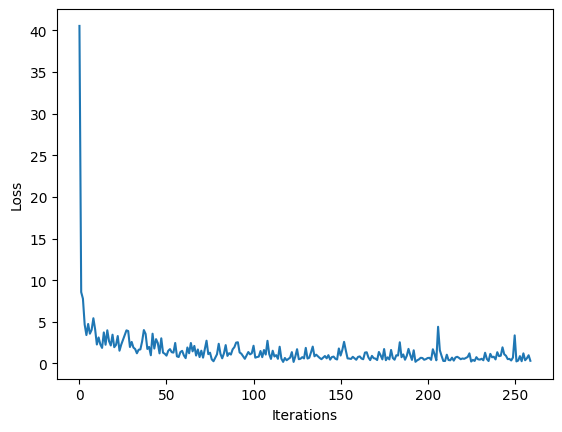

In [26]:
# 创建网络
net = ThreeLayerNetwork(input_num=784, hidden1_num=100, hidden2_num=100, output_num=1)
# 启动训练
losses = net.train(num_epochs=20, batch_size=20, eta=0.01)
# 画出损失函数的变化趋势
import matplotlib.pyplot as plt
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()